In [7]:
from hf_embeddings import get_hf_embeddings
from open_ai import get_openai_code_embedding
from cohere_embeddings import generate_cohere_code_embedding
from utils import read_files_from_folder
from compare_code import compute_pairwise_similarity
from plot import plot_tsne, plot_pca
from typing import Callable
import argparse, os
import numpy as np

EMBEDDINGS_METHODS = {
    'hf': get_hf_embeddings,
    'openai': get_openai_code_embedding,
    'cohere': generate_cohere_code_embedding,
}

def generate_embeddings(file_contents: dict, method: Callable, hf_model: str = None):
    """
    Generates embeddings for the given file contents using the specified method.
    """
    embeddings = {}
    for file_name, content in file_contents.items():
        print(f"\tGenerating embeddings for {file_name}...")
        if hf_model:
            embeddings[file_name] = method(content, hf_model)
        else:
            embeddings[file_name] = method(content)

    return embeddings



method = generate_cohere_code_embedding

all_embeddings = {}
embeddings = []
for fname in os.listdir("../data"):
    print(f"Generating embeddings for files in {fname}:")
    with open(f"../data/{fname}", "r") as f:
        file_contents = f.read()
    embedding_f = method(file_contents)
    all_embeddings[fname] = embedding_f
    embeddings.append(embedding_f)

embeddings = np.array(embeddings)

np.save("stored_embeddings", embeddings)


Generating embeddings for files in 1.py:
Generating embeddings for files in 2.py:
Generating embeddings for files in 3.py:
Generating embeddings for files in 4.py:
Generating embeddings for files in 5.py:
Generating embeddings for files in 6.py:
Generating embeddings for files in 7.py:


In [8]:
embeddings

array([[ 0.0451355 , -0.00554275, -0.01719666, ..., -0.01097107,
         0.01844788,  0.02555847],
       [ 0.01038361,  0.00595093, -0.0142746 , ...,  0.00090647,
        -0.0105896 ,  0.01560974],
       [ 0.05426025, -0.01934815,  0.02339172, ...,  0.07244873,
        -0.00336647,  0.03027344],
       ...,
       [ 0.00385857, -0.01163483, -0.04962158, ...,  0.06658936,
        -0.00061417,  0.01960754],
       [ 0.02333069, -0.00463486, -0.02095032, ...,  0.08300781,
        -0.02285767, -0.00349236],
       [-0.00514221,  0.02095032, -0.04666138, ...,  0.10095215,
        -0.01059723,  0.04003906]], shape=(7, 1024))

In [9]:
loaded_embeddings = np.load("stored_embeddings.npy")
loaded_embeddings

array([[ 0.0451355 , -0.00554275, -0.01719666, ..., -0.01097107,
         0.01844788,  0.02555847],
       [ 0.01038361,  0.00595093, -0.0142746 , ...,  0.00090647,
        -0.0105896 ,  0.01560974],
       [ 0.05426025, -0.01934815,  0.02339172, ...,  0.07244873,
        -0.00336647,  0.03027344],
       ...,
       [ 0.00385857, -0.01163483, -0.04962158, ...,  0.06658936,
        -0.00061417,  0.01960754],
       [ 0.02333069, -0.00463486, -0.02095032, ...,  0.08300781,
        -0.02285767, -0.00349236],
       [-0.00514221,  0.02095032, -0.04666138, ...,  0.10095215,
        -0.01059723,  0.04003906]], shape=(7, 1024))

In [10]:
all_embeddings = {}
i = 0
for fname in os.listdir("../data"):
    all_embeddings[fname] = loaded_embeddings[i]
    i += 1


In [11]:
all_embeddings

{'1.py': array([ 0.0451355 , -0.00554275, -0.01719666, ..., -0.01097107,
         0.01844788,  0.02555847], shape=(1024,)),
 '2.py': array([ 0.01038361,  0.00595093, -0.0142746 , ...,  0.00090647,
        -0.0105896 ,  0.01560974], shape=(1024,)),
 '3.py': array([ 0.05426025, -0.01934815,  0.02339172, ...,  0.07244873,
        -0.00336647,  0.03027344], shape=(1024,)),
 '4.py': array([ 0.0282135 ,  0.01768494, -0.03549194, ...,  0.07122803,
         0.01991272,  0.05267334], shape=(1024,)),
 '5.py': array([ 0.00385857, -0.01163483, -0.04962158, ...,  0.06658936,
        -0.00061417,  0.01960754], shape=(1024,)),
 '6.py': array([ 0.02333069, -0.00463486, -0.02095032, ...,  0.08300781,
        -0.02285767, -0.00349236], shape=(1024,)),
 '7.py': array([-0.00514221,  0.02095032, -0.04666138, ...,  0.10095215,
        -0.01059723,  0.04003906], shape=(1024,))}

Pairwise Similarity Matrix:
      1.py  2.py  3.py  4.py  5.py  6.py  7.py
1.py 1.000 0.745 0.698 0.538 0.493 0.482 0.493
2.py 0.745 1.000 0.715 0.514 0.515 0.469 0.514
3.py 0.698 0.715 1.000 0.520 0.490 0.466 0.534
4.py 0.538 0.514 0.520 1.000 0.624 0.618 0.570
5.py 0.493 0.515 0.490 0.624 1.000 0.690 0.641
6.py 0.482 0.469 0.466 0.618 0.690 1.000 0.692
7.py 0.493 0.514 0.534 0.570 0.641 0.692 1.000


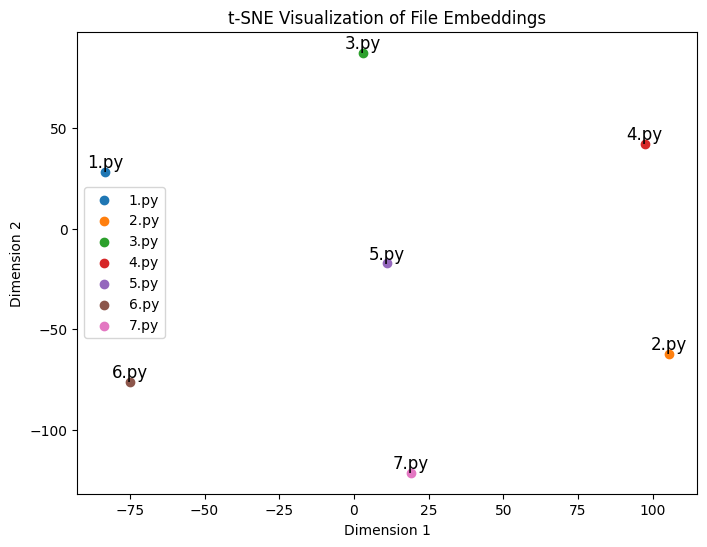

In [12]:
file_names, similarity_matrix = compute_pairwise_similarity(all_embeddings)
print("Pairwise Similarity Matrix:")
print(similarity_matrix.to_string(float_format=lambda x: f"{x:.3f}"))
# Plot visualization
plot_fn = plot_tsne
plot_fn(all_embeddings, file_names, "cohere")